In [2]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme()


In [ ]:
PROJECT_FOLDER = Path().absolute().parent
import sys
sys.path.append(str(PROJECT_FOLDER))


In [3]:
# import b_test
import model_training as mt

In [6]:
Path().absolute()

WindowsPath('c:/Users/User/OneDrive/Desktop/Code/ConnectFour')

Started Test!!


In [2]:

DATA_FOLDER = PROJECT_FOLDER / 'model_training' / 'data'
DATA_FILE = DATA_FOLDER / 'stable' / 'simulation_data_1_r1_r2.json'
DATA_FILE = DATA_FOLDER / 'simulation_data_testing.json'
DATA_FILE = DATA_FOLDER / 'master_db.json'

DATA_FILE.absolute()
# DATA_FILE.exists()
raw_data_df = pd.read_json(DATA_FILE)
print(raw_data_df.shape)
raw_data_df.head()

(35719, 9)


,game_id,player_one_id,player_two_id,winner_id,first_mover_id,moves,turns,start_time,end_time
0,1731877338926014-313026-dfd03d46,monte_carlo_50,monte_carlo_200,monte_carlo_200,monte_carlo_50,"[2, 5, 2, 4, 0, 3, 6, 2, 4, 3, 3, 5, 3, 5, 5, ...",42,NaT,NaT
1,1731877383226884-899336-1e5dcfb5,random_naive,monte_carlo_500,monte_carlo_500,random_naive,"[3, 3, 6, 3, 1, 3, 2, 3]",8,NaT,NaT
2,1731877406489089-634971-504d60a5,random_not_stupid,random_naive,random_not_stupid,random_not_stupid,"[1, 2, 0, 2, 2, 0, 4, 0, 0, 5, 1, 3, 3, 4, 3, ...",17,NaT,NaT
3,1731877406489619-734997-a801c867,random_naive,random_not_stupid,random_not_stupid,random_naive,"[0, 2, 6, 5, 2, 6, 4, 4, 1, 1, 5, 1, 0, 2, 5, ...",28,NaT,NaT
4,1731877406489619-209807-735741d8,random_naive,monte_carlo_1000,monte_carlo_1000,random_naive,"[6, 3, 2, 3, 0, 3, 3, 2, 1, 1, 1, 0]",12,NaT,NaT


In [32]:
raw_data_df.tail()

,game_id,player_one_id,player_two_id,winner_id,first_mover_id,moves,turns,start_time,end_time
35714,1732378989487148-441692-b3fc4d07,monte_carlo_50,monte_carlo_100,monte_carlo_100,monte_carlo_50,"[4, 1, 4, 3, 4, 4, 6, 2, 0, 2, 1, 3, 3, 2, 2, ...",30,2024-11-23 10:23:09.487148,2024-11-23 10:23:14.043207
35715,1732378994043207-623296-595a72db,monte_carlo_100,monte_carlo_50,monte_carlo_50,monte_carlo_100,"[0, 2, 2, 3, 2, 1, 4, 3, 2, 2, 0, 3, 3, 1, 3, ...",40,2024-11-23 10:23:14.043207,2024-11-23 10:23:19.982434
35716,1732378999982434-943096-dfc7146c,monte_carlo_50,monte_carlo_100,monte_carlo_100,monte_carlo_50,"[6, 6, 5, 3, 3, 2, 5, 1, 0, 4]",10,2024-11-23 10:23:19.982434,2024-11-23 10:23:23.493452
35717,1732379003493452-125409-9a644722,monte_carlo_50,monte_carlo_100,monte_carlo_100,monte_carlo_50,"[2, 4, 1, 6, 0, 3, 5, 2, 1, 1, 3, 2, 2, 3, 5, ...",28,2024-11-23 10:23:23.493452,2024-11-23 10:23:28.341530
35718,1732379008341530-606854-f025cdb5,monte_carlo_50,monte_carlo_100,monte_carlo_100,monte_carlo_50,"[5, 0, 3, 2, 4, 6, 2, 2, 3, 3, 4, 5, 4, 4, 1, ...",20,2024-11-23 10:23:28.341530,2024-11-23 10:23:33.354832


In [33]:
game_data = raw_data_df.iloc[-1]
game_data
boards = [mt.board.Board.from_turn_sequence(game_data['moves'][:i]) for i in range(1, len(game_data['moves']))]
# boards

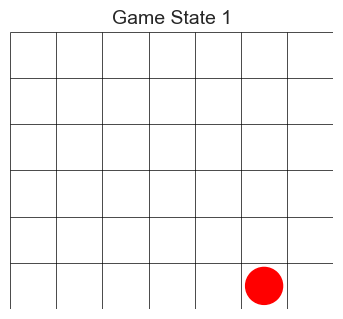

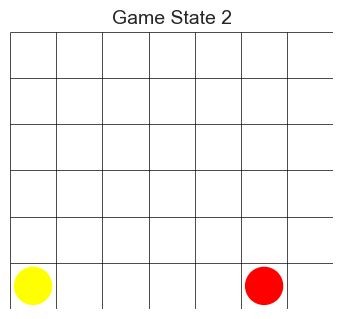

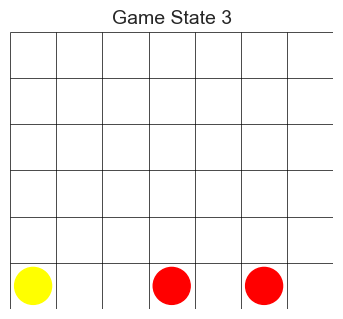

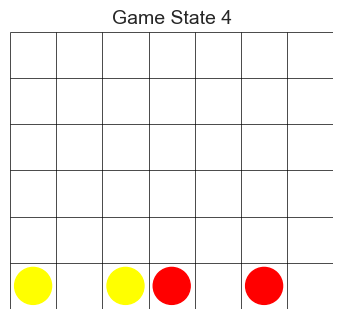

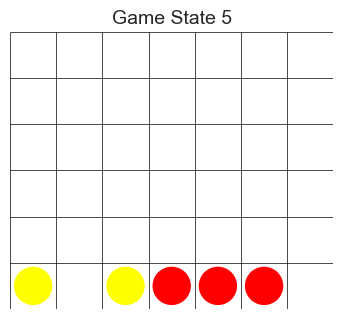

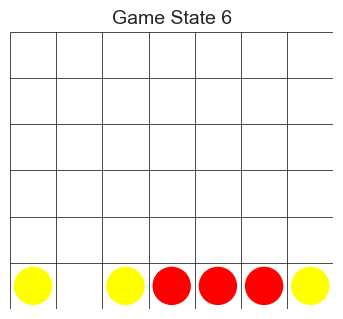

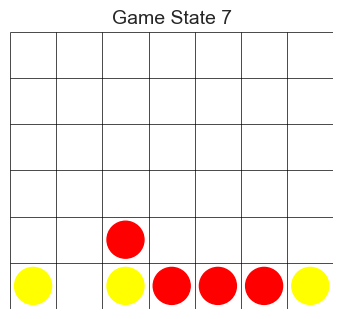

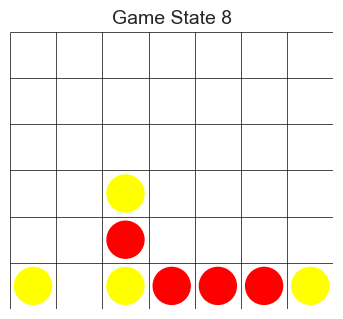

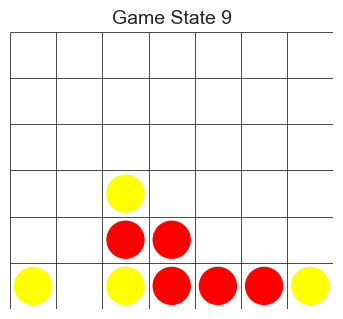

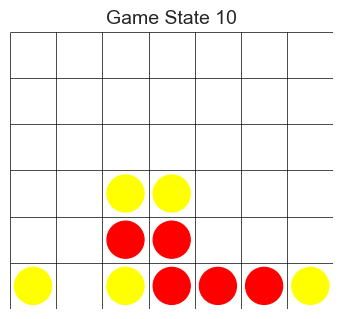

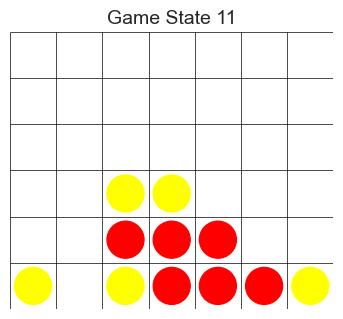

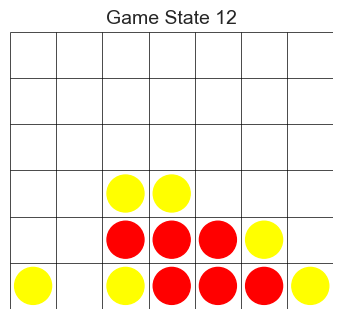

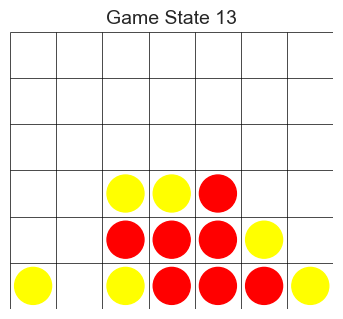

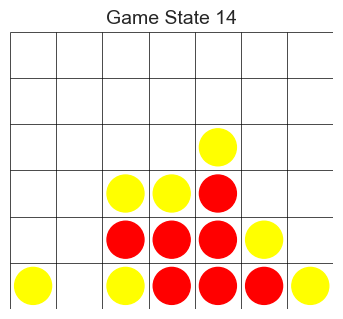

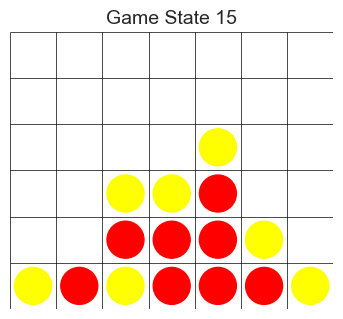

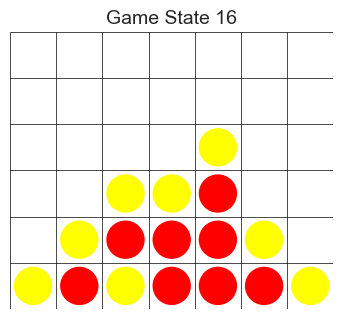

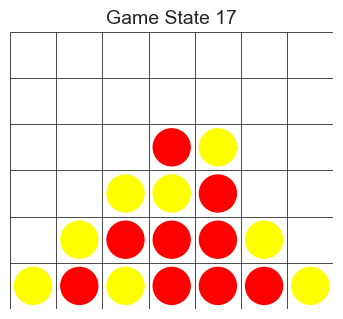

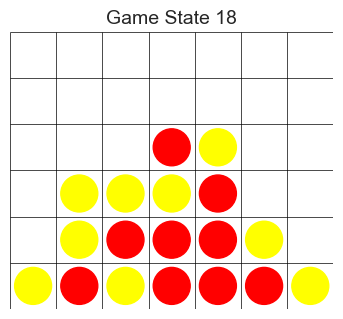

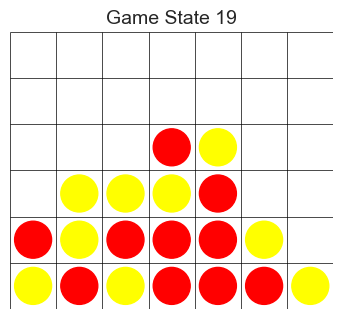

In [34]:

def visualize_connect4_individual(states, player1_color='red', player2_color='yellow', empty_color='white', line_color='black'):
    """
    Visualize each Connect 4 game state as a separate plot with grid lines.

    Args:
    - states (list of np.ndarray): A list of 7x6 numpy arrays representing the game states.
    - player1_color (str): Color for player 1 discs.
    - player2_color (str): Color for player 2 discs.
    - empty_color (str): Color for empty slots.
    - line_color (str): Color for the grid lines.
    """
    n_rows, n_cols = states[0].shape

    for idx, state in enumerate(states):
        # Create a new figure for each state
        fig, ax = plt.subplots(figsize=(n_cols, n_rows * 0.6))
        
        # Draw the Connect 4 grid
        for row in range(n_rows):
            for col in range(n_cols):
                value = state[row, col]
                if value == 0:  # Empty slot
                    color = empty_color
                elif value == 1:  # Player 1
                    color = player1_color
                elif value == 2:  # Player 2
                    color = player2_color
                else:
                    raise ValueError("Invalid grid value: must be 0, 1, or 2.")
                
                # Draw a circle for the slot
                ax.add_patch(plt.Circle((col + 0.5, n_rows - row - 0.5), 0.4, color=color))

        # Add grid lines
        for row in range(n_rows + 1):
            ax.hlines(row, 0, n_cols, colors=line_color, linewidth=0.5)  # Horizontal lines
        for col in range(n_cols + 1):
            ax.vlines(col, 0, n_rows, colors=line_color, linewidth=0.5)  # Vertical lines

        # Set grid limits and remove axes
        ax.set_xlim(0, n_cols)
        ax.set_ylim(0, n_rows)
        ax.set_aspect('equal')
        ax.axis('off')

        # Set a title for each grid
        ax.set_title(f"Game State {idx + 1}", fontsize=14)

        # Show the plot
        plt.show()


states = [board.grid for board in boards]
visualize_connect4_individual(states)

# Load Data

In [3]:
raw_data_df = pd.read_json(DATA_FILE)
print(raw_data_df.shape)
raw_data_df.head()

(35703, 9)


,game_id,player_one_id,player_two_id,winner_id,first_mover_id,moves,turns,start_time,end_time
0,1731877338926014-313026-dfd03d46,monte_carlo_50,monte_carlo_200,monte_carlo_200,monte_carlo_50,"[2, 5, 2, 4, 0, 3, 6, 2, 4, 3, 3, 5, 3, 5, 5, ...",42,NaT,NaT
1,1731877383226884-899336-1e5dcfb5,random_naive,monte_carlo_500,monte_carlo_500,random_naive,"[3, 3, 6, 3, 1, 3, 2, 3]",8,NaT,NaT
2,1731877406489089-634971-504d60a5,random_not_stupid,random_naive,random_not_stupid,random_not_stupid,"[1, 2, 0, 2, 2, 0, 4, 0, 0, 5, 1, 3, 3, 4, 3, ...",17,NaT,NaT
3,1731877406489619-734997-a801c867,random_naive,random_not_stupid,random_not_stupid,random_naive,"[0, 2, 6, 5, 2, 6, 4, 4, 1, 1, 5, 1, 0, 2, 5, ...",28,NaT,NaT
4,1731877406489619-209807-735741d8,random_naive,monte_carlo_1000,monte_carlo_1000,random_naive,"[6, 3, 2, 3, 0, 3, 3, 2, 1, 1, 1, 0]",12,NaT,NaT
